<a href="https://colab.research.google.com/github/Radhakrishna2055/GenerativeAI-B39/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2448 - val_loss: 0.0302
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0464 - val_loss: 0.0362
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0388 - val_loss: 0.0357
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0363 - val_loss: 0.0496
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0269 - val_loss: 0.0541
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0281 - val_loss: 0.0548
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0221 - val_loss: 0.0597
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - val_loss: 0.0590
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0213 - val_loss: 0.0435
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0225 - val_loss: 0.0488
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0205 - val_loss: 0.0356
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0182 - val_l

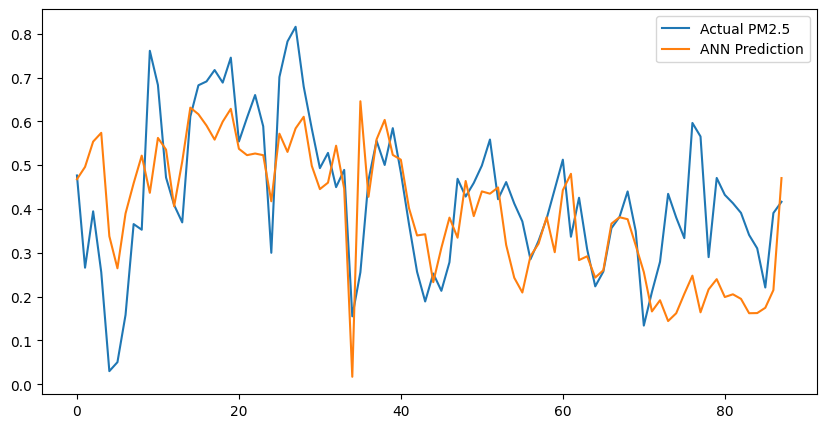

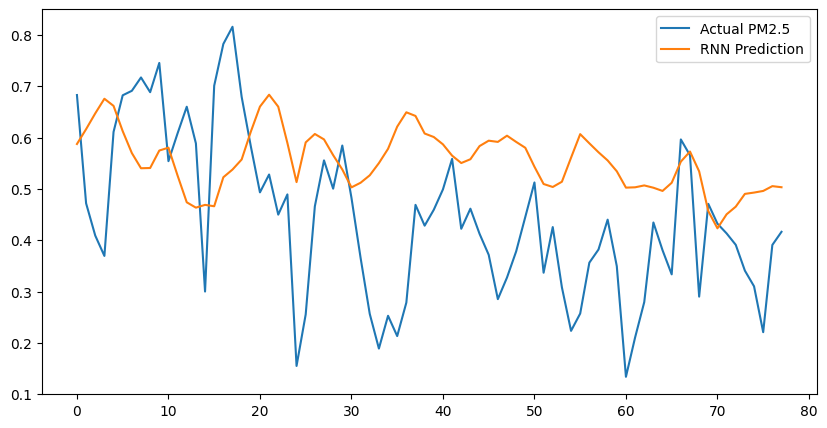

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load dataset
file_path = "Data_Air Pollutant.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Convert date column to datetime
df['From Date'] = pd.to_datetime(df['From Date'], format="%d-%m-%Y %H:%M", errors='coerce')
df.set_index('From Date', inplace=True)

# Select features and target variable
features = ['Temp', 'RH', 'WS', 'WD', 'SR', 'BP', 'AT']
target = 'PM2.5'

# Handle missing values
df = df[features + [target]].dropna()

# Normalize data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Train-test split
train_size = int(len(df) * 0.8)
train, test = df_scaled[:train_size], df_scaled[train_size:]

# Prepare data for ANN
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

# ANN Model (Fixed input warning)
ann_model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicit Input layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

ann_model.compile(optimizer='adam', loss='mse')
ann_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Prepare data for RNN
sequence_length = 10
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length, :-1])
        y.append(data[i+sequence_length, -1])
    return np.array(X), np.array(y)

X_train_rnn, y_train_rnn = create_sequences(train, sequence_length)
X_test_rnn, y_test_rnn = create_sequences(test, sequence_length)

# RNN Model (Fixed input warning)
rnn_model = Sequential([
    Input(shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train_rnn, y_train_rnn, epochs=50, batch_size=16, validation_data=(X_test_rnn, y_test_rnn))

# Plot predictions
pred_ann = ann_model.predict(X_test)
pred_rnn = rnn_model.predict(X_test_rnn)

plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual PM2.5')
plt.plot(pred_ann, label='ANN Prediction')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(y_test_rnn, label='Actual PM2.5')
plt.plot(pred_rnn, label='RNN Prediction')
plt.legend()
plt.show()
